In [1]:
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from simtk import unit, openmm
from perses.tests.utils import compute_potential_components
from openmmtools.constants import kB
from openmmtools import cache, utils
from perses.dispersed import feptasks
from perses.dispersed.feptasks import minimize
from perses.dispersed.utils import configure_platform
from perses.annihilation.rest import RESTTopologyFactory
from perses.annihilation.lambda_protocol import RESTState
import numpy as np
from perses.tests.test_topology_proposal import generate_atp, generate_dipeptide_top_pos_sys
from openmmtools.testsystems import AlanineDipeptideVacuum, AlanineDipeptideExplicit
import itertools
from simtk.openmm import app
cache.global_context_cache.platform = configure_platform(utils.get_fastest_platform().getName())


DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=6)
           2	LOAD_GLOBAL(arg=0, lineno=6)
           4	LOAD_METHOD(arg=1, lineno=6)
           6	LOAD_CONST(arg=1, lineno=6)
           8	CALL_METHOD(arg=1, lineno=6)
          10	STORE_FAST(arg=2, lineno=6)
          12	LOAD_FAST(arg=0, lineno=7)
          14	LOAD_CONST(arg=2, lineno=7)
          16	BINARY_SUBSCR(arg=None, lineno=7)
          18	LOAD_FAST(arg=1, lineno=7)
          20	LOAD_CONST(arg=3, lineno=7)
          22	BINARY_SUBSCR(arg=None, lineno=7)
          24	BINARY_MULTIPLY(arg=None, lineno=7)
          26	LOAD_FAST(arg=0, lineno=7)
          28	LOAD_CONST(arg=3, lineno=7)
          30	BINARY_SUBSCR(arg=None, lineno=7)
          32	LOAD_FAST(arg=1, lineno=7)
          34	LOAD_CONST(arg=2, lineno=7)
          36	BINARY_SUBSCR(arg=None, lineno=7)
          38	BINARY_MULTIPLY(arg=None, lineno=7)
          40	BINARY_SUBTRACT(arg=None, lineno=7)
          42	LOAD_FAST(arg=2, lineno=7)
          44	LO

DEBUG:numba.core.byteflow:dispatch pc=74, inst=BINARY_MULTIPLY(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$72binary_subscr.33']
DEBUG:numba.core.byteflow:dispatch pc=76, inst=BINARY_SUBTRACT(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$74binary_multiply.34']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=LOAD_CONST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36']
DEBUG:numba.core.byteflow:dispatch pc=82, inst=STORE_SUBSCR(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36', '$const80.37']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=9)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=86, inst=LOAD_CONST(arg=4, lineno=9)
DEBUG:numba.core.bytefl

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32b974810>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=zeros)
DEBUG:numba.core.ssa:on stmt: $const6.2 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $8call_method.3 = call $4load_method.1($const6.2, func=$4load_method.1, args=[Var($const6.2, coordinate_numba.py:6)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: c = $8call_method.3
DEBUG:numba.core.ssa:on stmt: $const14.5 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $16binary_subscr.6 = static_getitem(value=a, index=1, index_var=$const14.5)
DEBUG:numba.core.ssa:on stmt: $const20.8 = const(

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=CALL_METHOD(arg=2, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2', '$a8.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=STORE_FAST(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$10call_method.4']
D

DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=1, lineno=509)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_ATTR(arg=0, lineno=509)
DEBUG:numba.core.byteflow:stack ['$b10.4']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=UNPACK_SEQUENCE(arg=1, lineno=509)
DEBUG:numba.core.byteflow:stack ['$12load_attr.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=3, lineno=509)
DEBUG:numba.core.byteflow:stack ['$14unpack_sequence.6']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=510)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8', '$n20.9']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=34, lineno=510)
DE

DEBUG:numba.core.ssa:on stmt: <static> raise <class 'ValueError'>('incompatible array sizes for np.dot(a, b) (vector * vector)')
DEBUG:numba.core.ssa:==== SSA block analysis pass on 34
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bda5cd0>
DEBUG:numba.core.ssa:on stmt: $const34.0 = const(NoneType, None)
DEBUG:numba.core.ssa:on stmt: $36return_value.1 = cast(value=$const34.0)
DEBUG:numba.core.ssa:on stmt: return $36return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$12load_attr.5': [<numba.core.ir.Assign object at 0x2ad32bdb5510>],
             '$14unpack_sequence.6': [<numba.core.ir.Assign object at 0x2ad32bdb56d0>],
             '$14unpack_sequence.7': [<numba.core.ir.Assign object at 0x2ad32bdb55d0>],
             '$22compare_op.10': [<numba.core.ir.Assign object at 0x2ad32bdb5a10>],
             '$24pred': [<numba.core.ir.Assign object at 0x2ad32bdb5c50>],
             '$26load_global.0': [<numba.core.ir.Assign objec

DEBUG:numba.core.ssa:on stmt: $const12.1 = const(str, array size too large to fit in C int)
DEBUG:numba.core.ssa:on stmt: $14call_function.2 = call $10load_global.0($const12.1, func=$10load_global.0, args=[Var($const12.1, linalg.py:309)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: <static> raise <class 'OverflowError'>('array size too large to fit in C int')
DEBUG:numba.core.ssa:==== SSA block analysis pass on 18
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bcd7c90>
DEBUG:numba.core.ssa:on stmt: $const18.0 = const(NoneType, None)
DEBUG:numba.core.ssa:on stmt: $20return_value.1 = cast(value=$const18.0)
DEBUG:numba.core.ssa:on stmt: return $20return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$10load_global.0': [<numba.core.ir.Assign object at 0x2ad32bd14d10>],
             '$14call_function.2': [<numba.core.ir.Assign object at 0x2ad32bd14f90>],
             '$20return_value.1': [<numba.core.ir.Assign object at 0

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0', '$axis4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=22)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=10 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=SETUP_LOOP(ar

DEBUG:numba.core.byteflow:dispatch pc=96, inst=LOAD_FAST(arg=5, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21']
DEBUG:numba.core.byteflow:dispatch pc=98, inst=BINARY_SUBTRACT(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21', '$cos_angle96.22']
DEBUG:numba.core.byteflow:dispatch pc=100, inst=BINARY_MULTIPLY(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$98binary_subtract.23']
DEBUG:numba.core.byteflow:dispatch pc=102, inst=BINARY_ADD(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$100binary_multiply.24']
DEBUG:numba.core.byteflow:dispatch pc=104, inst=LOAD_FAST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25']
DEBUG:numba.core.byteflow:dispatch pc=106, inst=LOAD_CONST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25', '$rotation_matrix104.26']
DEBUG:numba.

DEBUG:numba.core.byteflow:stack ['$194binary_subscr.68', '$200binary_subscr.71']
DEBUG:numba.core.byteflow:dispatch pc=204, inst=LOAD_CONST(arg=6, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72']
DEBUG:numba.core.byteflow:dispatch pc=206, inst=LOAD_FAST(arg=5, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=BINARY_SUBTRACT(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73', '$cos_angle206.74']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=BINARY_MULTIPLY(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$208binary_subtract.75']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_FAST(arg=0, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76', '$axis212.7

DEBUG:numba.core.byteflow:dispatch pc=308, inst=LOAD_CONST(arg=6, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121']
DEBUG:numba.core.byteflow:dispatch pc=310, inst=LOAD_FAST(arg=5, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122']
DEBUG:numba.core.byteflow:dispatch pc=312, inst=BINARY_SUBTRACT(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122', '$cos_angle310.123']
DEBUG:numba.core.byteflow:dispatch pc=314, inst=BINARY_MULTIPLY(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$312binary_subtract.124']
DEBUG:numba.core.byteflow:dispatch pc=316, inst=LOAD_FAST(arg=0, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125']
DEBUG:numba.core.byteflow:dispatch pc=318, inst=LOAD_CONST(arg=8, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125', '$axis316.126']
DEBUG:numba.core.byteflow:dispatch pc=320, inst=BINARY_SUBSCR(arg=

DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set

DEBUG:numba.core.interpreter:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'axis']
    axis_norm = $6call_function.2            ['$6call_function.2', 'axis_norm']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $const14.1 = const(int, 3)               ['$const14.1']
    $16call_function.2 = call $12load_global.0($const14.1, func=$12load_global.0, args=[Var($const14.1, coordinate_numba.py:23)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', '$const14.1']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$1

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bc428d0>
DEBUG:numba.core.ssa:on stmt: axis = arg(0, name=axis)
DEBUG:numba.core.ssa:on stmt: angle = arg(1, name=angle)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: axis_norm = $6call_function.2
DEBUG:numba.core.ssa:on stmt: jump 10
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bc428d0>
DEBUG:numba.core.ssa:on stmt: $12load_global.0 = global(range: <class 'range'>)
DEBUG:numba.core.ssa:on stmt: $const14.1 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $16call_function.2 = call $12load_global.0($const14.1, fu

DEBUG:numba.core.ssa:on stmt: $const192.67 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $194binary_subscr.68 = static_getitem(value=axis, index=1, index_var=$const192.67)
DEBUG:numba.core.ssa:on stmt: $const198.70 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $200binary_subscr.71 = static_getitem(value=axis, index=0, index_var=$const198.70)
DEBUG:numba.core.ssa:on stmt: $202binary_multiply.72 = $194binary_subscr.68 * $200binary_subscr.71
DEBUG:numba.core.ssa:on stmt: $const204.73 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $208binary_subtract.75 = $const204.73 - cos_angle
DEBUG:numba.core.ssa:on stmt: $210binary_multiply.76 = $202binary_multiply.72 * $208binary_subtract.75
DEBUG:numba.core.ssa:on stmt: $const214.78 = const(int, 2)
DEBUG:numba.core.ssa:on stmt: $216binary_subscr.79 = static_getitem(value=axis, index=2, index_var=$const214.78)
DEBUG:numba.core.ssa:on stmt: $220binary_multiply.81 = $216binary_subscr.79 * sin_angle
DEBUG:numba.core.ssa:on stmt: $222binary_add.82 = $

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_FAST(arg=0, lineno=22)
           4	LOAD_CONST(arg=1, lineno=22)
           6	BINARY_POWER(arg=None, lineno=22)
           8	RETURN_VALUE(arg=None, lineno=22)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_POWER(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=22)
DEBUG:numba.core.byteflow:sta

DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=217)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3', '$a12.4']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$14call_function.5']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=219)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6', '$con

DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=60, inst=LOAD_DEREF(arg=2, lineno=226)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=62, inst=POP_JUMP_IF_FALSE(arg=68, lineno=226)
DEBUG:numba.core.byteflow:stack ['$60load_deref.0']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0), Edge(pc=68, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: 

DEBUG:numba.core.byteflow:dispatch pc=154, inst=STORE_FAST(arg=2, lineno=240)
DEBUG:numba.core.byteflow:stack ['$152inplace_multiply.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=156, inst=LOAD_FAST(arg=4, lineno=241)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=158, inst=LOAD_CONST(arg=1, lineno=241)
DEBUG:numba.core.byteflow:stack ['$exp156.0']
DEBUG:numba.core.byteflow:dispatch pc=160, inst=INPLACE_RSHIFT(arg=None, lineno=241)
DEBUG:numba.core.byteflow:stack ['$exp156.0', '$const158.1']
DEBUG:numba.core.byteflow:dispatch pc=162, inst=STORE_FAST(arg=4, lineno=241)
DEBUG:numba.core.byte

DEBUG:numba.core.byteflow:block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$64load_deref.0'}), (66, {'retval': '$64load_deref.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$68load_global.0'}), (70, {'res': '$const70.1'}), (72, {'func': '$68load_global.0', 'args': ['$const70.1'], 'res': '$72call_function.2'}), (74, {'exc': '$72call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$a76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$a76.0', 'rhs': '$const78.1', 'res': '$80compare_op.2'}), (82, {'pred': '$80compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={84: (), 1

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32beb4050>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on st

DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block analysis pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32beb4050>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$10load_deref.3': [<numba.core.ir.Assign object at 0x2ad32be0e4d0>],
             '$110compare_op.2': [<numba.core.ir.Assign object at 0x2ad32bd73510>],
             '$112pred': [<numba.core.ir.Assign object at 0x2ad32bd73d90>],
             '$114load_global.0': [<numba.core.ir.Assign object at 0x2ad32bd73690>],
             '$116load_method.1': [<numba.core.ir.Assign object at 0x2ad32bd73590>],
             '$120load_global.3': [<numba.core.ir.Assign object at 0x2ad32bd85d50>],
             '$124call_function.5': [<numba.core.ir.Assign object at 0x2ad32bd85d10>],
             '$126call_method.6': [<n

DEBUG:numba.core.ssa:on stmt: $const98.0 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: invert = $const98.0
DEBUG:numba.core.ssa:on stmt: exp = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be92c50>
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $112pred, 114, 130
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 114
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be92c50>
DEBUG:numba.core.ssa:on stmt: $114load_global.0 = global(math: <module 'math' from '/home/zhangi/miniconda3/envs/pe

DEBUG:numba.core.ssa:on stmt: $48load_deref.0 = freevar(is_integer: False)
DEBUG:numba.core.ssa:on stmt: bool50 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 98
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32be11d50>
DEBUG:numba.core.ssa:on stmt: $const98.0 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: invert = $const98.0
DEBUG:numba.core.ssa:on stmt: exp = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32be11d50>
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEBUG

DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32be11d50>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Fix SSA violator on var r
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be49550>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:first assign: r
DEBUG:numba.core.ssa:r

DEBUG:numba.core.ssa:on stmt: bool178 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $178pred, 180, 188
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be49550>
DEBUG:numba.core.ssa:on stmt: $const180.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184binary_true_divide.2 = $const180.0 / r
DEBUG:numba.core.ssa:on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be49550>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Replaced assignments: defaultdic

DEBUG:numba.core.ssa:find_def_from_bottom label 130
DEBUG:numba.core.ssa:find_def_from_top label 130
DEBUG:numba.core.ssa:idom 106 from label 130
DEBUG:numba.core.ssa:find_def_from_bottom label 106
DEBUG:numba.core.ssa:find_def_from_top label 106
DEBUG:numba.core.ssa:idom 0 from label 106
DEBUG:numba.core.ssa:find_def_from_bottom label 0
DEBUG:numba.core.ssa:incoming_def r = $6call_function.2
DEBUG:numba.core.ssa:find_def_from_bottom label 156
DEBUG:numba.core.ssa:find_def_from_top label 156
DEBUG:numba.core.ssa:insert phi node r.3 = phi(incoming_values=[], incoming_blocks=[]) at 156
DEBUG:numba.core.ssa:find_def_from_bottom label 148
DEBUG:numba.core.ssa:incoming_def r.1 = $152inplace_multiply.2
DEBUG:numba.core.ssa:find_def_from_bottom label 140
DEBUG:numba.core.ssa:find_def_from_top label 140
DEBUG:numba.core.ssa:idom 132 from label 140
DEBUG:numba.core.ssa:find_def_from_bottom label 132
DEBUG:numba.core.ssa:incoming_def r.2 = phi(incoming_values=[Var(r, numbers.py:217)], incoming_b

DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $112pred, 114, 130
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 114
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be0e7d0>
DEBUG:numba.core.ssa:on stmt: $114load_global.0 = global(math: <module 'math' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/lib-dynload/math.cpython-37m-x86_64-linux-gnu.so'>)
DEBUG:numba.core.ssa:on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)
DEBUG:numba.core.ssa:on stmt: $120load_global.3 = global(float: <class 'float'>)
DEBUG:numba.core.ssa:on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=

DEBUG:numba.core.ssa:on stmt: <static> raise <class 'OverflowError'>
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 48
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32beb4410>
DEBUG:numba.core.ssa:on stmt: $48load_deref.0 = freevar(is_integer: False)
DEBUG:numba.core.ssa:on stmt: bool50 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 98
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32beb4410>
DEBUG:numba.core.ssa:on stmt: $const98.0 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: invert = $const98.0
DEBUG:numba.core.ssa:on stmt: exp.1 = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32beb

DEBUG:numba.core.ssa:on stmt: branch $178pred, 180, 188
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32beb4410>
DEBUG:numba.core.ssa:on stmt: $const180.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184binary_true_divide.2 = $const180.0 / r.2
DEBUG:numba.core.ssa:on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32beb4410>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r.2)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Fix SSA violator on var invert
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32bd0f650>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ss

DEBUG:numba.core.ssa:on stmt: $const158.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: exp.2 = $160inplace_rshift.2
DEBUG:numba.core.ssa:on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1.1 = $168inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 132
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32bd0f650>
DEBUG:numba.core.ssa:on stmt: jump 176
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 176
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32bd0f650>
DEBUG:numba.core.ssa:on stmt: bool178 = gl

DEBUG:numba.core.ssa:on stmt: $const142.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $144binary_and.2 = exp.4 & $const142.1
DEBUG:numba.core.ssa:on stmt: bool146 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $146pred, 148, 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 148
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32be1b450>
DEBUG:numba.core.ssa:on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: r.1 = $152inplace_multiply.2
DEBUG:numba.core.ssa:on stmt: jump 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 156
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32be1b450>
DEBUG:numba.core.s

DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=208)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=208)
DEBUG:numba.core.byteflow:stack ['$const10.0']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=14 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=210)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=4, lineno=210)
DEBUG:numba.core.byteflow:stack ['$const14.0']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=211)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=211)
DEBUG:numba.core.byteflow:stack ['$dest_ndim18.1']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=BINARY_SUBTRACT(arg=None, lineno=211)


DEBUG:numba.core.byteflow:stack ['$src_dim_size68.0']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=COMPARE_OP(arg=3, lineno=221)
DEBUG:numba.core.byteflow:stack ['$src_dim_size68.0', '$const70.1']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)
DEBUG:numba.core.byteflow:stack ['$72compare_op.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=76, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=104, inst=LOAD_FAST(arg=4, 

DEBUG:numba.core.byteflow:block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$src_dim_size60.0'}), (62, {'res': '$dest_dim_size62.1'}), (64, {'lhs': '$src_dim_size60.0', 'rhs': '$dest_dim_size62.1', 'res': '$64compare_op.2'}), (66, {'pred': '$64compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={68: (), 104: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$src_dim_size68.0'}), (70, {'res': '$const70.1'}), (72, {'lhs': '$src_dim_size68.0', 'rhs': '$const70.1', 'res': '$72compare_op.2'}), (74, {'pred': '$72compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={76: (), 104: ()})
DEBUG:numba.core.byteflow:block_infos State(pc

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bd57dd0>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32bd57dd0>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=

DEBUG:numba.core.ssa:SSA violators {'src_index', 'dest_index'}
DEBUG:numba.core.ssa:Fix SSA violator on var src_index
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be49e90>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32be49e90>
DEBUG:

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 14
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32bc94b90>
DEBUG:numba.core.ssa:on stmt: $const14.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: src_index = $const14.0
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.3 = dest_ndim - src_ndim
DEBUG:numba.core.ssa:on stmt: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:on stmt: jump 26
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32bc94b90>
DEBUG:numba.core.ssa:on stmt: jump 28
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 28
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32bc94b90>
DEBUG:numba.core.ssa:on stmt: $32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def var='src_index' stmt=$32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def_from_top label 28
DEBUG:numba.core.ssa:insert phi node src_index.2 = phi(

DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=$const10.0)
DEBUG:numba.core.ssa:on stmt: return $12return_value.1
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 14
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32ba926d0>
DEBUG:numba.core.ssa:on stmt: $const14.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: src_index = $const14.0
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.3 = dest_ndim - src_ndim
DEBUG:numba.core.ssa:on stmt: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:first assign: dest_index
DEBUG:numba.core.ssa:replaced with: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:on stmt: jump 26
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32ba926d0>
DEBUG:numba.core.ssa:on stmt: jump 28
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 28
DEBUG:numba.core.ssa:Running <numb

DEBUG:numba.core.ssa:on stmt: $32compare_op.2 = src_index.2 < src_ndim
DEBUG:numba.core.ssa:on stmt: bool34 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $34pred, 36, 122
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 36
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32bc94050>
DEBUG:numba.core.ssa:on stmt: $40binary_subscr.2 = getitem(value=src_shape, index=src_index.2)
DEBUG:numba.core.ssa:on stmt: src_dim_size = $40binary_subscr.2
DEBUG:numba.core.ssa:on stmt: $48binary_subscr.5 = getitem(value=dest_shape, index=dest_index)
DEBUG:numba.core.ssa:find_def var='dest_index' stmt=$48binary_subscr.5 = getitem(value=dest_shape, index=dest_index)
DEBUG:numba.core.ssa:find_def_from_top label 36
DEBUG:numba.core.ssa:idom 28 from label 36
DEBUG:numba.core.ssa:find_def_from_bottom label 28
DEBUG:n

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=3, lineno=47)
           4	LOAD_CONST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	STORE_FAST(arg=4, lineno=47)
          10	LOAD_FAST(arg=3, lineno=48)
          12	LOAD_CONST(arg=2, lineno=48)
          14	BINARY_SUBSCR(arg=None, lineno=48)
          16	STORE_FAST(arg=5, lineno=48)
          18	LOAD_FAST(arg=3, lineno=49)
          20	LOAD_CONST(arg=3, lineno=49)
          22	BINARY_SUBSCR(arg=None, lineno=49)
          24	STORE_FAST(arg=6, lineno=49)
          26	LOAD_FAST(arg=1, lineno=50)
          28	LOAD_FAST(arg=0, lineno=50)
          30	BINARY_SUBTRACT(arg=None, lineno=50)
          32	STORE_FAST(arg=7, lineno=50)
          34	LOAD_FAST(arg=1, lineno=51)
          36	LOAD_FAST(arg=2, lineno=51)
          38	BINARY_SUBTRACT(arg=None, lineno=51)
          40	STORE_FAST(arg=8, lineno=51)
          42	LOAD_FAST(arg=7, lineno=53)
          44	

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=68, inst=LOAD_FAST(arg=9, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25']
DEBUG:numba.core.byteflow:dispatch pc=70, inst=BINARY_MULTIPLY(arg=None, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25', '$a_u68.26']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=STORE_FAST(arg=11, lineno=56)
DEBUG:numba.core.byteflow:stack ['$70binary_multiply.27']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=LOAD_GLOBAL(arg=1, lineno=58)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=76, inst=LOAD_FAST(arg=9, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=10, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28', '$a_u76.29']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=CALL_FUNCTION(arg=2, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28', '$a_u76.29', '$b_u78.30']
DEBUG:numba.core.byteflow:d

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=internal_coordinates, index=$const4.1) ['$6binary_subscr.2', '$const4.1', 'internal_coordinates']
    r = $6binary_subscr.2                    ['$6binary_subscr.2', 'r']
    $const12.4 = const(int, 1)               ['$const12.4']
    $14binary_subscr.5 = getitem(value=internal_coordinates, index=$const12.4) ['$14binary_subscr.5', '$const12.4', 'internal_coordinates']
    theta = $14binary_subscr.5               ['$14binary_subscr.5', 'theta']
    $const20.7 = const(int, 2)               ['$const20.7']
    $22binary_subscr.8 = getitem(value=internal_coordinates, inde

DEBUG:numba.core.ssa:on stmt: a = $30binary_subtract.11
DEBUG:numba.core.ssa:on stmt: $38binary_subtract.14 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: b = $38binary_subtract.14
DEBUG:numba.core.ssa:on stmt: $44load_global.16 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $48call_function.18 = call $44load_global.16(a, func=$44load_global.16, args=[Var(a, coordinate_numba.py:50)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $50binary_true_divide.19 = a / $48call_function.18
DEBUG:numba.core.ssa:on stmt: a_u = $50binary_true_divide.19
DEBUG:numba.core.ssa:on stmt: $56load_global.21 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $60call_function.23 = call $56load_global.21(b, func=$56load_global.21, args=[Var(b, coordinate_numba.py:51)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $62binary_true_divide.24 = b / $60call_function.23
DEBUG:numba.core.ssa:on

DEBUG:numba.core.ssa:SSA violators set()
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/perses-0.8.2.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:65: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  d_ang = np.dot(angle_rotation_matrix, d_r)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/perses-0.8.2.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:71: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  d_torsion = np.dot(torsion_rotation_matrix, d_ang)
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=0, lineno=47)
           4	LOAD_FAST(arg=1, lineno=47)
           6	BINARY_SUBTRACT(arg=None, lineno=47)
           8	RETURN_VALUE(arg=None, lineno=47)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=53)
DEBUG:numba.core.byteflow:stack ['$a_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=53)
DEBUG:numba.core.byteflow:stack ['$a_12.0', '$_48call_function_18_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=53)
DEBUG:numba.core.byteflow:stack ['$6binary_true_divide.2']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.

DEBUG:numba.core.interpreter:label 0:
    a_u_1 = arg(0, name=a_u_1)               ['a_u_1']
    r_1 = arg(1, name=r_1)                   ['r_1']
    $6binary_multiply.2 = r_1 * a_u_1        ['$6binary_multiply.2', 'a_u_1', 'r_1']
    $8return_value.3 = cast(value=$6binary_multiply.2) ['$6binary_multiply.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c326bd0>
DEBUG:numba.core.ssa:on stmt: a_u_1 = arg(0, name=a_u_1)
DEBUG:numba.core.ssa:on stmt: r_1 = arg(1, name=r_1)
DEBUG:numba.core.ssa:on stmt: $6binary_multiply.2 = r_1 * a_u_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_multiply.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_multiply.2': [<numba.core.ir.Assign object at 0x2ad32c2eaad0>],
        

DEBUG:numba.core.byteflow:stack ['$24compare_op.11']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0), Edge(pc=44, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=44 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=488)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=30, inst=LOAD_METHOD(arg=2, lineno=488)
DEBUG:numba.core.byteflow:stack ['$28load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=32, inst=LOAD_FAST(arg=2, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=34, inst=BUILD_TUPLE(arg=1, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1', '$m32.2']
DEBUG:numba.core.byteflow:dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1', '$34build

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c326650>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.8 = exhaust_iter(value=$14load_attr.6, count=1)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.7 = static_getitem(

DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=571)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=571)
DEBUG:numba.core.byteflow:stack ['$a2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=UNPACK_SEQUENCE(arg=2, lineno=571)
DEBUG:numba.core.byteflow:stack ['$4load_attr.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=3, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3', '$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=STORE_FAST(arg=4, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=572)
DEBUG:numba.core.byteflow:stack ['$b12.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=UNPACK_SEQUENCE(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack ['$14load_

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c500bd0>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: out = arg(2, name=out)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: _n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.8 = exhaust_iter(value=$14load_attr.6, count=1)
DEBUG:numba.co

DEBUG:numba.core.interpreter:label 0:
    bond_position_2 = arg(0, name=bond_position_2) ['bond_position_2']
    d_torsion_1 = arg(1, name=d_torsion_1)   ['d_torsion_1']
    $6binary_add.2 = bond_position_2 + d_torsion_1 ['$6binary_add.2', 'bond_position_2', 'd_torsion_1']
    $8return_value.3 = cast(value=$6binary_add.2) ['$6binary_add.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c6759d0>
DEBUG:numba.core.ssa:on stmt: bond_position_2 = arg(0, name=bond_position_2)
DEBUG:numba.core.ssa:on stmt: d_torsion_1 = arg(1, name=d_torsion_1)
DEBUG:numba.core.ssa:on stmt: $6binary_add.2 = bond_position_2 + d_torsion_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_add.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6bi

DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8']
DEBUG:numba.core.byteflow:dispatch pc=56, inst=LOAD_FAST(arg=2, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9']
DEBUG:numba.core.byteflow:dispatch pc=58, inst=LOAD_FAST(arg=3, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9', '$torsion_position56.10']
DEBUG:numba.core.byteflow:dispatch pc=60, inst=CALL_FUNCTION(arg=4, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9', '$torsion_position56.10', '$internal_coordinates58.11']
DEBUG:numba.core.byteflow:dispatch pc=62, inst=LOAD_FAST(arg=6, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$60call_function.12']
DEBUG:numba.core.byteflow:dispatch pc=64, inst=LOAD_FAST(arg=7, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$60call_

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    phi_set = arg(4, name=phi_set)           ['phi_set']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(phi_set, func=$2load_global.0, args=[Var(phi_set, coordinate_numba.py:80)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'phi_set']
    n_phis = $6call_function.2               ['$6call_function.2', 'n_phis']
    $10load_global.3 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>) ['$10load_global.3']
    $12load_method.4 = getattr(value=$10load_global.3, attr=zeros) ['$10load_global.3',

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	LOAD_FAST(arg=0, lineno=89)
           4	LOAD_FAST(arg=1, lineno=89)
           6	BINARY_SUBTRACT(arg=None, lineno=89)
           8	STORE_FAST(arg=3, lineno=89)
          10	LOAD_FAST(arg=2, lineno=90)
          12	LOAD_FAST(arg=1, lineno=90)
          14	BINARY_SUBTRACT(arg=None, lineno=90)
          16	STORE_FAST(arg=4, lineno=90)
          18	LOAD_FAST(arg=3, lineno=91)
          20	LOAD_GLOBAL(arg=0, lineno=91)
          22	LOAD_FAST(arg=3, lineno=91)
          24	CALL_FUNCTION(arg=1, lineno=91)
          26	BINARY_TRUE_DIVIDE(arg=None, lineno=91)
          28	STORE_FAST(arg=5, lineno=91)
          30	LOAD_FAST(arg=4, lineno=92)
          32	LOAD_GLOBAL(arg=0, lineno=92)
          34	LOAD_FAST(arg=4, lineno=92)
          36	CALL_FUNCTION(arg=1, lineno=92)
          38	BINARY_TRUE_DIVIDE(arg=None, lineno=92)
          40	STORE_FAST(arg=6, lineno=92)
  

DEBUG:numba.core.byteflow:dispatch pc=82, inst=LOAD_METHOD(arg=3, lineno=100)
DEBUG:numba.core.byteflow:stack ['$80load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=LOAD_FAST(arg=7, lineno=100)
DEBUG:numba.core.byteflow:stack ['$82load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=86, inst=CALL_METHOD(arg=1, lineno=100)
DEBUG:numba.core.byteflow:stack ['$82load_method.1', '$cos_theta84.2']
DEBUG:numba.core.byteflow:dispatch pc=88, inst=STORE_FAST(arg=8, lineno=100)
DEBUG:numba.core.byteflow:stack ['$86call_method.3']
DEBUG:numba.core.byteflow:dispatch pc=90, inst=LOAD_FAST(arg=8, lineno=101)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=92, inst=RETURN_VALUE(arg=None, lineno=101)
DEBUG:numba.core.byteflow:stack ['$theta90.4']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=80 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.b

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c281c10>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $20load_global.7 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $24call_function.9 = call $20load_global.7(a, func=$20load_global.7, args=[Var(a, coordinate_numba.py:89)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $26binary_true_divide.10 = a / $24call_function.9
DEBUG:

DEBUG:numba.core.ssa:on stmt: $26binary_true_divide.10 = a / $24call_function.9
DEBUG:numba.core.ssa:on stmt: a_u = $26binary_true_divide.10
DEBUG:numba.core.ssa:on stmt: $32load_global.12 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $36call_function.14 = call $32load_global.12(b, func=$32load_global.12, args=[Var(b, coordinate_numba.py:90)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $38binary_true_divide.15 = b / $36call_function.14
DEBUG:numba.core.ssa:on stmt: b_u = $38binary_true_divide.15
DEBUG:numba.core.ssa:on stmt: $42load_global.16 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $44load_method.17 = getattr(value=$42load_global.16, attr=dot)
DEBUG:numba.core.ssa:on stmt: $50call_method.20 = call $44load_method.17(a_u, b_u, func=$44load_method.17, args=[Var(a_u, coordinate_numba.py:91), Var(b_u, coordinate

DEBUG:numba.core.ssa:on stmt: $86call_method.3 = call $82load_method.1(cos_theta, func=$82load_method.1, args=[Var(cos_theta, coordinate_numba.py:95)], kws=(), vararg=None)
DEBUG:numba.core.ssa:find_def var='cos_theta' stmt=$86call_method.3 = call $82load_method.1(cos_theta, func=$82load_method.1, args=[Var(cos_theta, coordinate_numba.py:95)], kws=(), vararg=None)
DEBUG:numba.core.ssa:find_def_from_top label 80
DEBUG:numba.core.ssa:insert phi node cos_theta.3 = phi(incoming_values=[], incoming_blocks=[]) at 80
DEBUG:numba.core.ssa:find_def_from_bottom label 68
DEBUG:numba.core.ssa:find_def_from_top label 68
DEBUG:numba.core.ssa:idom 0 from label 68
DEBUG:numba.core.ssa:find_def_from_bottom label 0
DEBUG:numba.core.ssa:incoming_def cos_theta = $50call_method.20
DEBUG:numba.core.ssa:find_def_from_bottom label 62
DEBUG:numba.core.ssa:incoming_def cos_theta.1 = $const62.0
DEBUG:numba.core.ssa:find_def_from_bottom label 76
DEBUG:numba.core.ssa:incoming_def cos_theta.2 = $const76.0
DEBUG:num

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	LOAD_FAST(arg=1, lineno=89)
           4	LOAD_FAST(arg=0, lineno=91)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=91)
           8	RETURN_VALUE(arg=None, lineno=91)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=89)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=89)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=91)
DEBUG:numba.core.byteflow:stack ['$a_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=91)
DEBUG:numba.core.byteflow:stack ['$a_12.0', '$_24call_function_9_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=91)
DEBUG:numb

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0', '$bond_position4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=4, lineno=106)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=2, lineno=107)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=107)
DEBUG:numba.core.byteflow:stack ['$angle_position10.3']
DEB

DEBUG:numba.core.byteflow:stack ['$110load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=114, inst=CALL_METHOD(arg=1, lineno=123)
DEBUG:numba.core.byteflow:stack ['$110load_method.1', '$cos_theta112.2']
DEBUG:numba.core.byteflow:dispatch pc=116, inst=STORE_FAST(arg=12, lineno=123)
DEBUG:numba.core.byteflow:stack ['$114call_method.3']
DEBUG:numba.core.byteflow:dispatch pc=118, inst=LOAD_GLOBAL(arg=4, lineno=126)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=120, inst=LOAD_FAST(arg=7, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4']
DEBUG:numba.core.byteflow:dispatch pc=122, inst=LOAD_FAST(arg=8, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5']
DEBUG:numba.core.byteflow:dispatch pc=124, inst=CALL_FUNCTION(arg=2, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5', '$b_u122.6']
DEBUG:numba.core.byteflow:dispatch pc=126, inst=STORE_FAST(arg=13, lineno=126)
DEBUG:numba.core.byteflow:stack 

DEBUG:numba.core.byteflow:stack ['$204load_method.5']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=LOAD_FAST(arg=14, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=CALL_METHOD(arg=2, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6', '$plane2208.7']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_CONST(arg=3, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=COMPARE_OP(arg=1, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8', '$const212.9']
DEBUG:numba.core.byteflow:dispatch pc=216, inst=POP_JUMP_IF_FALSE(arg=224, lineno=137)
DEBUG:numba.core.byteflow:stack ['$214compare_op.10']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=218, stack=(), blockstack=(), npush=0), Edge(pc=224, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=188 nstack_initial=0), S

DEBUG:numba.core.byteflow:block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$const104.0'}), (106, {'value': '$const104.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={108: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=108 nstack_initial=0):
AdaptBlockInfo(insts=((108, {'res': '$108load_global.0'}), (110, {'item': '$108load_global.0', 'res': '$110load_method.1'}), (112, {'res': '$cos_theta112.2'}), (114, {'func': '$110load_method.1', 'args': ['$cos_theta112.2'], 'res': '$114call_method.3'}), (116, {'value': '$114call_method.3'}), (118, {'res': '$118load_global.4'}), (120, {'res': '$a_u120.5'}), (122, {'res': '$b_u122.6'}), (124, {'func': '$118load_global.4', 'args': ['$a_u120.5', '$b_u122.6'], 'res': '$124call_function.7'}), (126, {'value': '$124call_function.7'}), (128, {'res': '$128load_global.8'}), (130, {'res': '$b_u130.9'}), (132, {'res': '$c_u132.10'}), (134, {'func': '$128load_global.8', 'arg

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c539c10>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ssa:on stmt: $28load_global.10 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on

DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block analysis pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c539c10>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block analysis pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2ad32c539c10>
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/

DEBUG:numba.core.ssa:SSA violators {'phi', 'cos_phi', 'cos_theta'}
DEBUG:numba.core.ssa:Fix SSA violator on var phi
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c2c7750>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ssa:on s

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c2c7750>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c2c7750>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c2c

DEBUG:numba.core.ssa:on stmt: branch $102pred, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c536210>
DEBUG:numba.core.ssa:on stmt: $const104.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_theta = $const104.0
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 108
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c536210>
DEBUG:numba.core.ssa:on stmt: $108load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $110load_method.1 = getattr(value=$108load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: $114call_method.3 = call $110load_method.1(cos_theta, func=$110load_method.1, args=[Var(cos_theta, coordinate_numba.py:118)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: theta = $114call_method.3


DEBUG:numba.core.ssa:on stmt: $238return_value.7 = cast(value=$236call_method.6)
DEBUG:numba.core.ssa:on stmt: return $238return_value.7
DEBUG:numba.core.ssa:Fix SSA violator on var cos_phi
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c81ced0>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:

DEBUG:numba.core.ssa:on stmt: $const174.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const174.0
DEBUG:numba.core.ssa:replaced with: cos_phi.1 = $const174.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c81ced0>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2ad32c81ced0>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.cor

DEBUG:numba.core.ssa:on stmt: $const98.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $100compare_op.2 = cos_theta < $const98.1
DEBUG:numba.core.ssa:on stmt: bool102 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, coordinate_numba.py:121),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $102pred, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c2fdcd0>
DEBUG:numba.core.ssa:on stmt: $const104.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_theta = $const104.0
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 108
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c2fdcd0>
DEBUG:numba.core.ssa:on stmt: $108load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.

DEBUG:numba.core.ssa:on stmt: phi.1 = $220unary_negative.1
DEBUG:numba.core.ssa:on stmt: jump 224
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 224
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c2fdcd0>
DEBUG:numba.core.ssa:on stmt: phi.2 = phi(incoming_values=[Var(phi, coordinate_numba.py:135), Var(phi.1, coordinate_numba.py:138)], incoming_blocks=[192, 218])
DEBUG:numba.core.ssa:on stmt: $224load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $226load_method.1 = getattr(value=$224load_global.0, attr=array)
DEBUG:numba.core.ssa:on stmt: $234build_list.5 = build_list(items=[Var(r, coordinate_numba.py:115), Var(theta, coordinate_numba.py:123), Var(phi.2, coordinate_numba.py:140)])
DEBUG:numba.core.ssa:on stmt: $236call_method.6 = call $226load_method.1($234build_list.5, func=$226load_method.1, args=[Var($234build_list.5, coordinat

DEBUG:numba.core.ssa:on stmt: $154load_global.20 = global(_norm: CPUDispatcher(<function _norm at 0x2ad32bd407a0>))
DEBUG:numba.core.ssa:on stmt: $158call_function.22 = call $154load_global.20(plane2, func=$154load_global.20, args=[Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $160binary_multiply.23 = $152call_function.19 * $158call_function.22
DEBUG:numba.core.ssa:on stmt: $162binary_true_divide.24 = $146call_method.16 / $160binary_multiply.23
DEBUG:numba.core.ssa:on stmt: cos_phi = $162binary_true_divide.24
DEBUG:numba.core.ssa:on stmt: $const168.26 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $170compare_op.27 = cos_phi < $const168.26
DEBUG:numba.core.ssa:on stmt: bool172 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $172pred = call bool172($170compare_op.27, func=bool172, args=(Var($170compare_op.27, coordinate_numba.py:130),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $172pred, 174, 180
DEBUG:numba.co

DEBUG:numba.core.ssa:on stmt: $72load_method.28 = getattr(value=$70load_global.27, attr=dot)
DEBUG:numba.core.ssa:on stmt: $78call_method.31 = call $72load_method.28(a_u, b_u, func=$72load_method.28, args=[Var(a_u, coordinate_numba.py:110), Var(b_u, coordinate_numba.py:111)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: cos_theta = $78call_method.31
DEBUG:numba.core.ssa:on stmt: $const84.33 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:find_def var='cos_theta' stmt=$86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:on stmt: bool88 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $88pred = call bool88($86compare_op.34, func=bool88, args=(Var($86compare_op.34, coordinate_numba.py:119),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $88pred, 90, 96
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 90
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2ad32c53

DEBUG:numba.core.ssa:on stmt: $198call_method.3 = call $194load_method.1(cos_phi.3, func=$194load_method.1, args=[Var(cos_phi.3, coordinate_numba.py:135)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: phi = $198call_method.3
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204load_method.5 = getattr(value=$202load_global.4, attr=dot)
DEBUG:numba.core.ssa:on stmt: $210call_method.8 = call $204load_method.5(a, plane2, func=$204load_method.5, args=[Var(a, coordinate_numba.py:106), Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const212.9 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $214compare_op.10 = $210call_method.8 <= $const212.9
DEBUG:numba.core.ssa:on stmt: bool216 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $216pred = call bool216($214compare_op.10, func=

DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$angle_position_12.0'}), (4, {'res': '$bond_position_24.1'}), (6, {'lhs': '$angle_position_12.0', 'rhs': '$bond_position_24.1', 'res': '$6binary_subtract.2'}), (8, {'retval': '$6binary_subtract.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    angle_position_1 = arg(0, name=angle_position_1) ['angle_position_1']
    bond_position_2 = arg(1, name=bond_position_2) ['bond_position_2']
    $6binary_subtract.2 = angle_position_1 - bond_position_2 ['$6binary_subtract.2', 'angle_position_1', 'bond_position_2']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:nu

DEBUG:numba.core.ssa:on stmt: a_1 = arg(1, name=a_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divide.2 = a_1 / _32call_function_12_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_true_divide.2': [<numba.core.ir.Assign object at 0x2ad32c2f9310>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2ad32c2f97d0>],
             '_32call_function_12_1': [<numba.core.ir.Assign object at 0x2ad32c3365d0>],
             'a_1': [<numba.core.ir.Assign object at 0x2ad32c2f9590>]})
DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=107)
           2	LOAD_FAST(arg=1, lineno=107)
           4	LOAD_FAST(arg=0, lineno=111)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=111)
           8	RETURN_VALUE(arg=None, lineno=111)
DEBUG:numba.core.byteflow:pend

conducting subsequent work with the following platform: CUDA


INFO:rdkit:Enabling RDKit 2020.09.1 jupyter extensions


conducting subsequent work with the following platform: CUDA


In [2]:
temperature = 298.0 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT

In [3]:
# Create vanilla system for alanine dipeptide in solvent
# ala_solvent = AlanineDipeptideExplicit()
ala_solvent = AlanineDipeptideExplicit(use_dispersion_correction=False, nonbondedMethod=app.PME)
ala_solvent.system.removeForce(4)
# ala_solvent.system.getForce(3).setNonbondedMethod(openmm.NonbondedForce.NoCutoff)
# ala_solvent.system.getForce(3).setNonbondedMethod(openmm.NonbondedForce.CutoffPeriodic)
# ala_solvent.system.getForce(3).setUseDispersionCorrection(False)
# ala_solvent.system.getForce(3).setReactionFieldDielectric(78.3)
# ala_solvent.system.getForce(3).setEwaldErrorTolerance(5e-4)



In [4]:
ala_solvent.system.getForces()

[<simtk.openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b423a083210> >,
 <simtk.openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2b423a083d80> >,
 <simtk.openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2b423a083540> >,
 <simtk.openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b423a083750> >]

In [5]:
ala_solvent.system.getForce(3).getUseSwitchingFunction()

True

In [6]:
ala_solvent.system.getForce(3).getSwitchingDistance()

Quantity(value=0.8500000000000001, unit=nanometer)

In [7]:
ala_solvent.system.getForce(3).getCutoffDistance()

Quantity(value=1.0, unit=nanometer)

In [4]:
# Set temperatures
T_min = 298.0 * unit.kelvin
# T = 600 * unit.kelvin
T = 298.0 * unit.kelvin

# Set sys, pos, top
system = ala_solvent.system
positions = ala_solvent.positions
topology = ala_solvent.topology

In [12]:
class REST2(RESTTopologyFactory):
    """
    subclass REST, but move solvent-solvent to custom nonbonded force
    """
    def _add_nonbonded_force_terms(self):
        from openmmtools.constants import ONE_4PI_EPS0 # OpenMM constant for Coulomb interactions (implicitly in md_unit_system units)

        standard_nonbonded_force = openmm.NonbondedForce()
        cutoff_distance = 1
        reaction_field_dieelectric = 78.3
        
#         custom_nonbonded_expression = f"(4*epsilon*((sigma/r)^12-(sigma/r)^6) + ONE_4PI_EPS0*chargeProd/r) * scale_factor; \
#                                         sigma=0.5*(sigma1+sigma2); \
#                                         epsilon=sqrt(epsilon1*epsilon2); \
#                                         ONE_4PI_EPS0 = {ONE_4PI_EPS0}; \
#                                         chargeProd=q1*q2;"
        custom_nonbonded_expression = f"(4*epsilon*((sigma/r)^12-(sigma/r)^6) + ONE_4PI_EPS0*chargeProd*((1/r) + k_rf*(r)^2 - c_rf)) * scale_factor; \
                                        sigma=0.5*(sigma1+sigma2); \
                                        epsilon=sqrt(epsilon1*epsilon2); \
                                        ONE_4PI_EPS0 = {ONE_4PI_EPS0}; \
                                        chargeProd=q1*q2; \
                                        k_rf=((1/r_cutoff)^3)*(epsilon_solvent-1)/((2*epsilon_solvent)+1); \
                                        c_rf=(1/r_cutoff)*(3*epsilon_solvent)/((2*epsilon_solvent)+1); \
                                        r_cutoff={cutoff_distance}; \
                                        epsilon_solvent={reaction_field_dieelectric}; \
                                        "
        
        custom_nonbonded_expression += self.scaling_expression(nb=True)
        custom_nonbonded_force = openmm.CustomNonbondedForce(custom_nonbonded_expression)

        self._out_system.addForce(standard_nonbonded_force)
        self._out_system_forces[standard_nonbonded_force.__class__.__name__] = standard_nonbonded_force

        self._out_system.addForce(custom_nonbonded_force)
        self._out_system_forces[custom_nonbonded_force.__class__.__name__] = custom_nonbonded_force

        #set the appropriate parameters
        epsilon_solvent = self._og_system_forces['NonbondedForce'].getReactionFieldDielectric()
        r_cutoff = self._og_system_forces['NonbondedForce'].getCutoffDistance()
        if self._nonbonded_method != openmm.NonbondedForce.NoCutoff:
            standard_nonbonded_force.setReactionFieldDielectric(epsilon_solvent)
            standard_nonbonded_force.setCutoffDistance(r_cutoff)
            custom_nonbonded_force.setCutoffDistance(r_cutoff)
        if self._nonbonded_method in [openmm.NonbondedForce.PME, openmm.NonbondedForce.Ewald]:
            [alpha_ewald, nx, ny, nz] = self._og_system_forces['NonbondedForce'].getPMEParameters()
            delta = self._og_system_forces['NonbondedForce'].getEwaldErrorTolerance()
            standard_nonbonded_force.setPMEParameters(alpha_ewald, nx, ny, nz)
            standard_nonbonded_force.setEwaldErrorTolerance(delta)
        standard_nonbonded_force.setNonbondedMethod(self._nonbonded_method)
        custom_nonbonded_force.setNonbondedMethod(self._translate_nonbonded_method_to_custom(self._nonbonded_method))
        
        #translate nonbonded to custom
        if self._og_system_forces['NonbondedForce'].getUseDispersionCorrection():
            self._out_system_forces['NonbondedForce'].setUseDispersionCorrection(True)
            if self._use_dispersion_correction:
                custom_nonbonded_force.setUseLongRangeCorrection(True)
            else:
                custom_nonbonded_force.setUseLongRangeCorrection(False)
        else:
            standard_nonbonded_force.setUseDispersionCorrection(False)
            custom_nonbonded_force.setUseLongRangeCorrection(False)
            
        if self._og_system_forces['NonbondedForce'].getUseSwitchingFunction():
            switching_distance = self._og_system_forces['NonbondedForce'].getSwitchingDistance()
            standard_nonbonded_force.setUseSwitchingFunction(True)
            standard_nonbonded_force.setSwitchingDistance(switching_distance)
            custom_nonbonded_force.setUseSwitchingFunction(True)
#             custom_nonbonded_force.setSwitchingDistance(switching_distance)
            custom_nonbonded_force.setSwitchingDistance(0)
        else:
            standard_nonbonded_force.setUseSwitchingFunction(False)
            custom_nonbonded_force.setUseSwitchingFunction(False)
        
        print("get og rf dieelectric ", self._og_system_forces['NonbondedForce'].getReactionFieldDielectric())
        print("get std rf dieelectric ", standard_nonbonded_force.getReactionFieldDielectric())
        
        print("get og cutoff dist ", self._og_system_forces['NonbondedForce'].getCutoffDistance())
        print("get std cutoff dist ", standard_nonbonded_force.getCutoffDistance())
        print("get custom cutoff dist ", custom_nonbonded_force.getCutoffDistance())
        
        print("get og nonbonded method ", self._nonbonded_method)
        print("get std nonbonded method ", standard_nonbonded_force.getNonbondedMethod())
        print("get custom nonbonded method ", custom_nonbonded_force.getNonbondedMethod())
        
        print("get og use dispersion ", self._og_system_forces['NonbondedForce'].getUseDispersionCorrection())
        print("get std use dispersion ", standard_nonbonded_force.getUseDispersionCorrection())
        print("get custom use dispersion ", custom_nonbonded_force.getUseLongRangeCorrection())
        
        print("get og use switching fn ", self._og_system_forces['NonbondedForce'].getUseSwitchingFunction())
        print("get std use switching fn ", standard_nonbonded_force.getUseSwitchingFunction())
        print("get custom use switching fn ", custom_nonbonded_force.getUseSwitchingFunction())
        
        print("get og switching dist ", self._og_system_forces['NonbondedForce'].getSwitchingDistance())
        print("get std switching dist ", standard_nonbonded_force.getSwitchingDistance())
        print("get custom switching dist ", custom_nonbonded_force.getSwitchingDistance())
   
        custom_nonbonded_force.addPerParticleParameter("q")
        custom_nonbonded_force.addPerParticleParameter("sigma")
        custom_nonbonded_force.addPerParticleParameter("epsilon")
        custom_nonbonded_force.addPerParticleParameter("identifier")

        custom_nonbonded_force.addGlobalParameter('solute_scale', 1.0)
        custom_nonbonded_force.addGlobalParameter('inter_scale', 1.0)

        #finally, make a custombondedforce to treat the exceptions
        custom_bonded_expression = f"(4*epsilon*((sigma/r)^12-(sigma/r)^6) + ONE_4PI_EPS0*chargeProd/r) * scale_factor; \
                                        ONE_4PI_EPS0 = {ONE_4PI_EPS0};"
    
#         custom_bonded_expression = f"(4*epsilon*((sigma/r)^12-(sigma/r)^6) + ONE_4PI_EPS0*chargeProd*((1/r) + k_rf*r^2 - c_rf)) * scale_factor; \
#                                          ONE_4PI_EPS0 = {ONE_4PI_EPS0}; \
#                                          k_rf=(1/r_cutoff^3)*(epsilon_solvent-1)/(2*epsilon_solvent+1); \
#                                         c_rf=(1/r_cutoff)*(3*epsilon_solvent)/(2*epsilon_solvent+1); \
#                                         r_cutoff={cutoff_distance}; \
#                                         epsilon_solvent={reaction_field_dieelectric};"
    
        custom_bonded_expression += self.scaling_expression()

        custom_bond_force = openmm.CustomBondForce(custom_bonded_expression)
        self._out_system.addForce(custom_bond_force)
        self._out_system_forces["CustomExceptionForce"] = custom_bond_force

        #charges
        custom_bond_force.addPerBondParameter("chargeProd")

        #sigma
        custom_bond_force.addPerBondParameter("sigma")

        #epsilon
        custom_bond_force.addPerBondParameter("epsilon")

        #identifier
        custom_bond_force.addPerBondParameter("identifier")

        #global params
        custom_bond_force.addGlobalParameter('solute_scale', 1.0)
        custom_bond_force.addGlobalParameter('inter_scale', 1.0)
    
    def _add_nonbondeds(self):
        self._solute_exceptions, self._interexceptions = [], []

        #the output nonbonded force _only_ contains solvent atoms (the rest are zeroed); same with exceptions
        """
        First, handle the NonbondedForce in the out_system
        """
        og_nb_force = self._og_system_forces['NonbondedForce']
        for particle_idx in range(self._num_particles):
            q, sigma, epsilon = og_nb_force.getParticleParameters(particle_idx)
            identifier = self.get_identifier(particle_idx)

            if identifier == 1:
                self._out_system_forces['NonbondedForce'].addParticle(q, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForce'].addParticle([q, sigma, epsilon, identifier])
            else:
                self._out_system_forces['NonbondedForce'].addParticle(q*0.0, sigma, epsilon*0.0)
                self._out_system_forces['CustomNonbondedForce'].addParticle([q, sigma, epsilon, identifier])

        #add appropriate interaction group
        solute_ig, solvent_ig = set(self._solute_region), set(self._solvent_region)
        self._out_system_forces['CustomNonbondedForce'].addInteractionGroup(solute_ig, solvent_ig)
        self._out_system_forces['CustomNonbondedForce'].addInteractionGroup(solute_ig, solute_ig)

        #handle exceptions
        for exception_idx in range(og_nb_force.getNumExceptions()):
            p1, p2, chargeProd, sigma, epsilon = og_nb_force.getExceptionParameters(exception_idx)
            identifier = self.get_identifier([p1, p2])
            if identifier == 1:
                self._out_system_forces['NonbondedForce'].addException(p1, p2, chargeProd, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForce'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
            elif identifier == 0:
                self._solute_exceptions.append([p1, p2, [chargeProd, sigma, epsilon]])
                self._out_system_forces['NonbondedForce'].addException(p1, p2, chargeProd*0.0, sigma, epsilon*0.0)
                self._out_system_forces['CustomNonbondedForce'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
            elif identifier == 2:
                self._interexceptions.append([p1, p2, [chargeProd, sigma, epsilon]])
                self._out_system_forces['NonbondedForce'].addException(p1, p2, chargeProd*0.0, sigma, epsilon*0.0)
                self._out_system_forces['CustomNonbondedForce'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions

        # # Add exceptions/exclusions to CustomNonbonded for inter region
        # for pair in list(itertools.product(solute_ig, solvent_ig)):
        #     p1 = pair[0]
        #     p2 = pair[1]
        #     self._out_system_forces['NonbondedForce'].addException(p1, p2, chargeProd * 0.0, sigma, epsilon * 0.0)
        #     self._out_system_forces['CustomNonbondedForce'].addExclusion(p1, p2)

        #now add the CustomBondForce for exceptions
        exception_force = self._out_system_forces['CustomExceptionForce']

        for solute_exception_term in self._solute_exceptions:
            p1, p2, [chargeProd, sigma, epsilon] = solute_exception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 0
                exception_force.addBond(p1, p2, [chargeProd, sigma, epsilon, identifier])

        for interexception_term in self._interexceptions:
            p1, p2, [chargeProd, sigma, epsilon] = interexception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 2
                exception_force.addBond(p1, p2, [chargeProd, sigma, epsilon, identifier])

        # # Add inter region exceptions to the CustomBondForce
        # for pair in list(itertools.product(solute_ig, solvent_ig)):
        #     p1 = pair[0]
        #     p2 = pair[1]
        #     p1_charge, p1_sigma, p1_epsilon = og_nb_force.getParticleParameters(p1)
        #     p2_charge, p2_sigma, p2_epsilon = og_nb_force.getParticleParameters(p2)
        #     identifier = 2
        #     exception_force.addBond(p1, p2, [p1_charge * p2_charge, 0.5 * (p1_sigma + p2_sigma),
        #                                      np.sqrt(p1_epsilon * p2_epsilon), identifier])

In [5]:
class REST3(RESTTopologyFactory):
    """
    subclass REST, but move solvent-solvent to custom nonbonded force
    """
    def _add_nonbonded_force_terms(self):
        from openmmtools.constants import ONE_4PI_EPS0 # OpenMM constant for Coulomb interactions (implicitly in md_unit_system units)

        alchemical_pme_treatment = 'direct-space'
        alchemical_rf_treatment= 'switched'
        nonbonded_method = self._og_system_forces['NonbondedForce'].getNonbondedMethod()
        reference_force = self._og_system_forces['NonbondedForce']
        is_ewald_method = nonbonded_method in [openmm.NonbondedForce.Ewald,
                                               openmm.NonbondedForce.PME]
        is_rf_method = nonbonded_method in [openmm.NonbondedForce.CutoffPeriodic,
                                            openmm.NonbondedForce.CutoffNonPeriodic]
        is_periodic_method = is_ewald_method or nonbonded_method == openmm.NonbondedForce.CutoffPeriodic
        use_exact_pme_treatment = is_ewald_method and alchemical_pme_treatment == 'exact'
        
        ## Get sterics energy expression
        sterics_mixing_rules = ('epsilon = sqrt(epsilon1*epsilon2);'  # Mixing rule for epsilon.
                                'sigma = 0.5*(sigma1 + sigma2);')  # Mixing rule for sigma.
        # Soft-core Lennard-Jones.
        exceptions_sterics_energy_expression = ('U_sterics;'
                                                'U_sterics = ((scale_factor)^softcore_a)*4*epsilon*x*(x-1.0);'
                                                'x = (sigma/reff_sterics)^6;'
                                                # Effective softcore distance for sterics.
                                                'reff_sterics = sigma*((softcore_alpha*(1.0-(scale_factor))^softcore_b + (r/sigma)^softcore_c))^(1/softcore_c);')
                                                
        sterics_energy_expression = exceptions_sterics_energy_expression + sterics_mixing_rules
        sterics_energy_expression += self.scaling_expression(nb=True)
        exceptions_sterics_energy_expression += self.scaling_expression()
        
        
        ## Get electrostatics energy expression
        electrostatics_prefix = ('U_electrostatics;'
                                     'U_electrostatics=((scale_factor)^softcore_d)*ONE_4PI_EPS0*chargeprod')

        # Effective softcore distance for electrostatics (common to all methods).
        electrostatics_suffix = ('reff_electrostatics = sigma*((softcore_beta*(1.0-(scale_factor))^softcore_e + (r/sigma)^softcore_f))^(1/softcore_f);'
                                 'ONE_4PI_EPS0 = {};').format(ONE_4PI_EPS0)  # Already in OpenMM units.

        # Define mixing rules.
        electrostatics_mixing_rules = ('chargeprod = charge1*charge2;'  # Mixing rule for charges.
                                       'sigma = 0.5*(sigma1 + sigma2);')  # Mixing rule for sigma.
        
        
        # Standard Coulomb expression with softened core. This is used
        #   - When the nonbonded method of the reference force is NoCutoff.
        #   - When alchemical_pme_treatment is set to 'coulomb'.
        #   - With 1-4 exceptions, unless self.consistent_exceptions is True.
        coulomb_expression = '/reff_electrostatics;'
        
        # Soft-core Coulomb.
        if nonbonded_method in [openmm.NonbondedForce.NoCutoff]:
            electrostatics_method_expression = coulomb_expression
        # Reaction-field electrostatics.
        elif nonbonded_method in [openmm.NonbondedForce.CutoffPeriodic, openmm.NonbondedForce.CutoffNonPeriodic]:
#             electrostatics_method_expression = self._get_reaction_field_unique_expression(reference_force)
            raise ValueError("reaction field stuff not copied yet!")
        # PME electrostatics.
        elif nonbonded_method in [openmm.NonbondedForce.PME, openmm.NonbondedForce.Ewald]:
            # Ewald direct-space electrostatics.
            if alchemical_pme_treatment == 'direct-space':
                [alpha_ewald, nx, ny, nz] = reference_force.getPMEParameters()
                if (alpha_ewald/alpha_ewald.unit) == 0.0:
                    # If alpha is 0.0, alpha_ewald is computed by OpenMM from from the error tolerance.
                    tol = reference_force.getEwaldErrorTolerance()
                    alpha_ewald = (1.0/reference_force.getCutoffDistance()) * np.sqrt(-np.log(2.0*tol))

                    alpha_ewald = alpha_ewald.value_in_unit_system(unit.md_unit_system)
                    pme_expression = ("*erfc(alpha_ewald*reff_electrostatics)/reff_electrostatics;"
                                      "alpha_ewald = {};").format(alpha_ewald)
                    electrostatics_method_expression = pme_expression
            # Use switched standard Coulomb potential, following MTS scheme described in
            # http://dx.doi.org/10.1063/1.1385159
            elif alchemical_pme_treatment == 'coulomb':
                electrostatics_method_expression = coulomb_expression
            else:
                raise ValueError("Unknown alchemical_pme_treatment scheme '{}'".format(alchemical_pme_treatment))
        else:
            raise ValueError("Nonbonded method {} not supported yet.".format(nonbonded_method))

        # Define energy expression for 1,4 electrostatic exceptions.
        exceptions_electrostatics_energy_expression = electrostatics_prefix
        consistent_exceptions = False
        if consistent_exceptions:
            exceptions_electrostatics_energy_expression += electrostatics_method_expression
        else:
            exceptions_electrostatics_energy_expression += coulomb_expression
        exceptions_electrostatics_energy_expression += electrostatics_suffix

        # Define energy expression for electrostatics.
        electrostatics_energy_expression = (electrostatics_prefix + electrostatics_method_expression +
                                            electrostatics_suffix + electrostatics_mixing_rules)

        electrostatics_energy_expression += self.scaling_expression(nb=True)
        exceptions_electrostatics_energy_expression += self.scaling_expression()
        
        print(sterics_energy_expression)
        print(electrostatics_energy_expression)
        
        

        ## Create forces
#         standard_nonbonded_force = openmm.NonbondedForce()
        import copy
        standard_nonbonded_force = copy.deepcopy(reference_force)
        custom_nonbonded_force_sterics = openmm.CustomNonbondedForce(sterics_energy_expression)
        custom_nonbonded_force_elec = openmm.CustomNonbondedForce(electrostatics_energy_expression)
        custom_bond_force_sterics = openmm.CustomBondForce(exceptions_sterics_energy_expression)
        custom_bond_force_elec = openmm.CustomBondForce(exceptions_electrostatics_energy_expression)
        
        self._out_system.addForce(standard_nonbonded_force)
        self._out_system_forces[standard_nonbonded_force.__class__.__name__] = standard_nonbonded_force

        self._out_system.addForce(custom_nonbonded_force_sterics)
        self._out_system_forces[custom_nonbonded_force_sterics.__class__.__name__ + 'Sterics'] = custom_nonbonded_force_sterics

        self._out_system.addForce(custom_nonbonded_force_elec)
        self._out_system_forces[custom_nonbonded_force_elec.__class__.__name__ + 'Elec'] = custom_nonbonded_force_elec
        
        self._out_system.addForce(custom_bond_force_sterics)
        self._out_system_forces[custom_bond_force_sterics.__class__.__name__ + 'Sterics'] = custom_bond_force_sterics

        self._out_system.addForce(custom_bond_force_elec)
        self._out_system_forces[custom_bond_force_elec.__class__.__name__ + 'Elec'] = custom_bond_force_elec
        
#         # Set standard nonbonded force parameters
#         epsilon_solvent = reference_force.getReactionFieldDielectric()
#         r_cutoff = reference_force.getCutoffDistance()
#         if self._nonbonded_method != openmm.NonbondedForce.NoCutoff:
#             standard_nonbonded_force.setReactionFieldDielectric(epsilon_solvent)
#             standard_nonbonded_force.setCutoffDistance(r_cutoff)
#         if self._nonbonded_method in [openmm.NonbondedForce.PME, openmm.NonbondedForce.Ewald]:
#             [alpha_ewald, nx, ny, nz] = reference_force.getPMEParameters()
#             delta = reference_force.getEwaldErrorTolerance()
#             standard_nonbonded_force.setPMEParameters(alpha_ewald, nx, ny, nz)
#             standard_nonbonded_force.setEwaldErrorTolerance(delta)
#         standard_nonbonded_force.setNonbondedMethod(self._nonbonded_method)

#         if reference_force.getUseDispersionCorrection():
#             standard_nonbonded_force.setUseDispersionCorrection(True)
#         else:
#             standard_nonbonded_force.setUseDispersionCorrection(False)
            
#         if reference_force.getUseSwitchingFunction():
#             switching_distance = reference_force.getSwitchingDistance()
#             standard_nonbonded_force.setUseSwitchingFunction(True)
#             standard_nonbonded_force.setSwitchingDistance(switching_distance)
#         else:
#             standard_nonbonded_force.setUseSwitchingFunction(False)
        
        # Set customnonbondedforce sterics parameters
        for force in [custom_nonbonded_force_sterics]:
            force.addPerParticleParameter("sigma")  # Lennard-Jones sigma
            force.addPerParticleParameter("epsilon")  # Lennard-Jones epsilon
            force.setUseSwitchingFunction(reference_force.getUseSwitchingFunction())
            force.setCutoffDistance(reference_force.getCutoffDistance())
            force.setSwitchingDistance(reference_force.getSwitchingDistance())
            if self._use_dispersion_correction:
                force.setUseLongRangeCorrection(True)
            else:
                force.setUseLongRangeCorrection(False)
            if is_periodic_method:
                force.setNonbondedMethod(openmm.CustomNonbondedForce.CutoffPeriodic)
            else:
                force.setNonbondedMethod(reference_force.getNonbondedMethod())
                
            force.addGlobalParameter('solute_scale', 1.0)
            force.addGlobalParameter('inter_scale', 1.0)
            force.addPerParticleParameter("identifier")
        
        # Set customnonbondedforce elec parameters
        for force in [custom_nonbonded_force_elec]:
            force.addPerParticleParameter("charge")  # partial charge
            force.addPerParticleParameter("sigma")  # Lennard-Jones sigma
            if ((is_ewald_method and alchemical_pme_treatment == 'coulomb') or
                    (is_rf_method and alchemical_rf_treatment == 'switched')):
                # Use switching function for alchemical electrostatics to ensure force continuity at cutoff.
                force.setUseSwitchingFunction(True)
            else:
                force.setUseSwitchingFunction(False)
            switch_width = 1.0*unit.angstroms
            force.setSwitchingDistance(reference_force.getCutoffDistance() - switch_width)
            force.setCutoffDistance(reference_force.getCutoffDistance())
            force.setUseLongRangeCorrection(False)  # long-range dispersion correction is meaningless for electrostatics

            if is_periodic_method:
                force.setNonbondedMethod(openmm.CustomNonbondedForce.CutoffPeriodic)
            else:
                force.setNonbondedMethod(reference.getNonbondedMethod())
            
            force.addGlobalParameter('solute_scale', 1.0)
            force.addGlobalParameter('inter_scale', 1.0)
            force.addPerParticleParameter("identifier")
    
        # Set custombond electrostatics parameters
        for force in [custom_bond_force_elec]:
            force.addPerBondParameter("chargeprod")
            force.addPerBondParameter("sigma") 
            force.addGlobalParameter('solute_scale', 1.0)
            force.addGlobalParameter('inter_scale', 1.0)
            force.addPerBondParameter("identifier")
    
        # Set custombond sterics parameters
        for force in [custom_bond_force_sterics]:
            force.addPerBondParameter("sigma")  # Lennard-Jones effective sigma
            force.addPerBondParameter("epsilon") 
            force.addGlobalParameter('solute_scale', 1.0)
            force.addGlobalParameter('inter_scale', 1.0)
            force.addPerBondParameter("identifier")
    
    
        # Add global parameters to forces.
        def add_global_parameters(force):
            alchemical_region = {'softcore_alpha': 0.5,
                                 'softcore_a': 1,
                                 'softcore_b': 1,
                                 'softcore_c': 6,
                                 'softcore_beta': 0.0, 
                                 'softcore_d': 1, 
                                 'softcore_e': 1,
                                 'softcore_f': 2
            }
            
            force.addGlobalParameter('softcore_alpha', alchemical_region['softcore_alpha'])
            force.addGlobalParameter('softcore_beta', alchemical_region['softcore_beta'])
            force.addGlobalParameter('softcore_a', alchemical_region['softcore_a'])
            force.addGlobalParameter('softcore_b', alchemical_region['softcore_b'])
            force.addGlobalParameter('softcore_c', alchemical_region['softcore_c'])
            force.addGlobalParameter('softcore_d', alchemical_region['softcore_d'])
            force.addGlobalParameter('softcore_e', alchemical_region['softcore_e'])
            force.addGlobalParameter('softcore_f', alchemical_region['softcore_f'])

        for force in [custom_nonbonded_force_sterics, custom_nonbonded_force_elec, custom_bond_force_sterics, custom_bond_force_elec]:
            add_global_parameters(force)
    

    
    def _add_nonbondeds(self):
        self._solute_exceptions_sterics, self._interexceptions_sterics, self._solute_exceptions_elec, self._interexceptions_elec = [], [], [], []

        #the output nonbonded force _only_ contains solvent atoms (the rest are zeroed); same with exceptions
        """
        First, handle the NonbondedForce in the out_system
        """
        og_nb_force = self._og_system_forces['NonbondedForce']
        for particle_idx in range(self._num_particles):
            q, sigma, epsilon = og_nb_force.getParticleParameters(particle_idx)
            identifier = self.get_identifier(particle_idx)

            if identifier == 1:
#                 self._out_system_forces['NonbondedForce'].addParticle(q, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForceSterics'].addParticle([sigma, epsilon, identifier])
                self._out_system_forces['CustomNonbondedForceElec'].addParticle([q, sigma, identifier])
            else:
                self._out_system_forces['NonbondedForce'].setParticleParameters(particle_idx, q*0.0, sigma, epsilon*0.0)
                self._out_system_forces['CustomNonbondedForceSterics'].addParticle([sigma, epsilon, identifier])
                self._out_system_forces['CustomNonbondedForceElec'].addParticle([q, sigma, identifier])

        #add appropriate interaction group
        solute_ig, solvent_ig = set(self._solute_region), set(self._solvent_region)
        self._out_system_forces['CustomNonbondedForceSterics'].addInteractionGroup(solute_ig, solvent_ig)
        self._out_system_forces['CustomNonbondedForceSterics'].addInteractionGroup(solute_ig, solute_ig)
        self._out_system_forces['CustomNonbondedForceElec'].addInteractionGroup(solute_ig, solvent_ig)
        self._out_system_forces['CustomNonbondedForceElec'].addInteractionGroup(solute_ig, solute_ig)

        #handle exceptions
        for exception_idx in range(og_nb_force.getNumExceptions()):
            p1, p2, chargeProd, sigma, epsilon = og_nb_force.getExceptionParameters(exception_idx)
#             print(exception_idx, chargeProd, epsilon)
            identifier = self.get_identifier([p1, p2])
            
            # Check if this is an exception or an exclusion
            is_exception_epsilon = abs(epsilon.value_in_unit_system(unit.md_unit_system)) > 0.0
            is_exception_chargeprod = abs(chargeProd.value_in_unit_system(unit.md_unit_system)) > 0.0
            
            if identifier == 1:
#                 self._out_system_forces['NonbondedForce'].addException(p1, p2, chargeProd, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForceSterics'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
                self._out_system_forces['CustomNonbondedForceElec'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
            elif identifier == 0:
                if is_exception_epsilon:
                    self._solute_exceptions_sterics.append([p1, p2, [chargeProd, sigma, epsilon]])
                    self._out_system_forces['NonbondedForce'].setExceptionParameters(exception_idx, p1, p2, chargeProd, sigma, epsilon*0.0)
                    epsilon = 0.0
                self._out_system_forces['CustomNonbondedForceSterics'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
                if is_exception_chargeprod:
                    self._solute_exceptions_elec.append([p1, p2, [chargeProd, sigma, epsilon]])
                    self._out_system_forces['NonbondedForce'].setExceptionParameters(exception_idx, p1, p2, chargeProd*0.0, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForceElec'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
            elif identifier == 2:
                if is_exception_epsilon:
                    self._interexceptions_sterics.append([p1, p2, [chargeProd, sigma, epsilon]])
                    self._out_system_forces['NonbondedForce'].setExceptionParameters(exception_idx, p1, p2, chargeProd, sigma, epsilon*0.0)
                    epsilon = 0.0
                self._out_system_forces['CustomNonbondedForceSterics'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions
                if is_exception_chargeprod:
                    self._interexceptions_elec.append([p1, p2, [chargeProd, sigma, epsilon]])
                    self._out_system_forces['NonbondedForce'].setExceptionParameters(exception_idx, p1, p2, chargeProd*0.0, sigma, epsilon)
                self._out_system_forces['CustomNonbondedForceElec'].addExclusion(p1, p2) #maintain consistent exclusions w/ exceptions

    
        #now add the CustomBondForce for exceptions
        exception_force_sterics = self._out_system_forces['CustomBondForceSterics']
        exception_force_elec = self._out_system_forces['CustomBondForceElec']

        for solute_exception_term in self._solute_exceptions_sterics:
            p1, p2, [chargeProd, sigma, epsilon] = solute_exception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 0
                exception_force_sterics.addBond(p1, p2, [sigma, epsilon, identifier])
                
        for solute_exception_term in self._solute_exceptions_elec:
            p1, p2, [chargeProd, sigma, epsilon] = solute_exception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 0                
                exception_force_elec.addBond(p1, p2, [chargeProd, sigma, identifier])

        for interexception_term in self._interexceptions_sterics:
            p1, p2, [chargeProd, sigma, epsilon] = interexception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 2
                exception_force_sterics.addBond(p1, p2, [sigma, epsilon, identifier])
        
        for interexception_term in self._interexceptions_elec:
            p1, p2, [chargeProd, sigma, epsilon] = interexception_term
            if (chargeProd.value_in_unit_system(unit.md_unit_system) != 0.0) or (epsilon.value_in_unit_system(unit.md_unit_system) != 0.0):
                identifier = 2
                exception_force_elec.addBond(p1, p2, [chargeProd, sigma, identifier])

In [6]:
# Compute energy for REST system
# Create REST system
res1 = list(topology.residues())[1]
rest_atoms = [atom.index for atom in res1.atoms()]
# factory = RESTTopologyFactory(system, solute_region=rest_atoms, use_dispersion_correction=False)
# factory = REST2(system, solute_region=rest_atoms, use_dispersion_correction=False)
factory = REST3(system, solute_region=rest_atoms, use_dispersion_correction=False)

REST_system = factory.REST_system

# Create thermodynamic state
lambda_zero_alchemical_state = RESTState.from_system(REST_system)
thermostate = ThermodynamicState(REST_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T)
compound_thermodynamic_state.set_alchemical_parameters(beta_0, beta_m)

# Minimize and save energy
integrator = openmm.VerletIntegrator(1.0 * unit.femtosecond)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(positions)
sampler_state = SamplerState.from_context(context)
REST_energy = compound_thermodynamic_state.reduced_potential(sampler_state)

# Compute energy for non-RESTified system
# # Determine regions and scaling factors
# solute = rest_atoms
# solvent = [i for i in range(topology.getNumAtoms()) if i not in rest_atoms]
# solute_scaling = beta_m / beta_0
# inter_scaling = np.sqrt(beta_m / beta_0)

# # Scale the terms in the bond force appropriately
# bond_force = system.getForce(0)
# for bond in range(bond_force.getNumBonds()):
#     p1, p2, length, k = bond_force.getBondParameters(bond)
#     if p1 in solute and p2 in solute:
#         bond_force.setBondParameters(bond, p1, p2, length, k * solute_scaling)
#     elif (p1 in solute and p2 in solvent) or (p1 in solvent and p2 in solute):
#         bond_force.setBondParameters(bond, p1, p2, length, k * inter_scaling)

# # Scale the terms in the angle force appropriately
# angle_force = system.getForce(1)
# for angle_index in range(angle_force.getNumAngles()):
#     p1, p2, p3, angle, k = angle_force.getAngleParameters(angle_index)
#     if p1 in solute and p2 in solute and p3 in solute:
#         angle_force.setAngleParameters(angle_index, p1, p2, p3, angle, k * solute_scaling)
#     elif set([p1, p2, p3]).intersection(set(solute)) != set() and set([p1, p2, p3]).intersection(
#             set(solvent)) != set():
#         angle_force.setAngleParameters(angle_index, p1, p2, p3, angle, k * inter_scaling)

# # Scale the terms in the torsion force appropriately
# torsion_force = system.getForce(2)
# for torsion_index in range(torsion_force.getNumTorsions()):
#     p1, p2, p3, p4, periodicity, phase, k = torsion_force.getTorsionParameters(torsion_index)
#     if p1 in solute and p2 in solute and p3 in solute and p4 in solute:
#         torsion_force.setTorsionParameters(torsion_index, p1, p2, p3, p4, periodicity, phase, k * solute_scaling)
#     elif set([p1, p2, p3, p4]).intersection(set(solute)) != set() and set([p1, p2, p3, p4]).intersection(
#             set(solvent)) != set():
#         torsion_force.setTorsionParameters(torsion_index, p1, p2, p3, p4, periodicity, phase, k * inter_scaling)

# # Scale the exceptions in the nonbonded force appropriately
# nb_force = system.getForce(3)
# for nb_index in range(nb_force.getNumExceptions()):
#     p1, p2, chargeProd, sigma, epsilon = nb_force.getExceptionParameters(nb_index)
#     if p1 in solute and p2 in solute:
#         nb_force.setExceptionParameters(nb_index, p1, p2, solute_scaling * chargeProd, sigma, solute_scaling * epsilon)
#     elif (p1 in solute and p2 in solvent) or (p1 in solvent and p2 in solute):
#         nb_force.setExceptionParameters(nb_index, p1, p2, inter_scaling * chargeProd, sigma, inter_scaling * epsilon)

# # Scale nonbonded interactions for solute-solute region by adding exceptions for all pairs of atoms
# exception_pairs = [tuple(sorted([nb_force.getExceptionParameters(nb_index)[0], nb_force.getExceptionParameters(nb_index)[1]])) for nb_index in range(nb_force.getNumExceptions())]
# solute_pairs = set([tuple(sorted(pair)) for pair in list(itertools.product(solute, solute))])
# for pair in list(solute_pairs):
#     p1 = pair[0]
#     p2 = pair[1]
#     p1_charge, p1_sigma, p1_epsilon = nb_force.getParticleParameters(p1)
#     p2_charge, p2_sigma, p2_epsilon = nb_force.getParticleParameters(p2)
#     if p1 != p2:
#         if pair not in exception_pairs:
#             nb_force.addException(p1, p2, p1_charge * p2_charge * solute_scaling, 0.5 * (p1_sigma + p2_sigma),
#                                   np.sqrt(p1_epsilon * p2_epsilon) * solute_scaling)

# # Scale nonbonded interactions for inter region by adding exceptions for all pairs of atoms
# for pair in list(itertools.product(solute, solvent)):
#     p1 = pair[0]
#     p2 = int(pair[1])  # otherwise, will be a numpy int
#     p1_charge, p1_sigma, p1_epsilon = nb_force.getParticleParameters(p1)
#     p2_charge, p2_sigma, p2_epsilon = nb_force.getParticleParameters(p2)
#     if tuple(sorted(pair)) not in exception_pairs:
#         nb_force.addException(p1, p2, p1_charge * p2_charge * inter_scaling, 0.5 * (p1_sigma + p2_sigma), np.sqrt(p1_epsilon * p2_epsilon) * inter_scaling)

# Get energy
thermostate = ThermodynamicState(system, temperature=T_min)
integrator = openmm.VerletIntegrator(1.0 * unit.femtosecond)
context = thermostate.create_context(integrator)
context.setPositions(positions)
sampler_state = SamplerState.from_context(context)
nonREST_energy = thermostate.reduced_potential(sampler_state)

INFO:REST:No MonteCarloBarostat added.
INFO:REST:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=3.2852863, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=3.2861648000000003, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=3.1855098), unit=nanometer)]
INFO:REST:No unknown forces.


U_sterics;U_sterics = ((scale_factor)^softcore_a)*4*epsilon*x*(x-1.0);x = (sigma/reff_sterics)^6;reff_sterics = sigma*((softcore_alpha*(1.0-(scale_factor))^softcore_b + (r/sigma)^softcore_c))^(1/softcore_c);epsilon = sqrt(epsilon1*epsilon2);sigma = 0.5*(sigma1 + sigma2);scale_factor = solute_scale*_is_solute + solvent_scale*_is_solvent + inter_scale*_is_inter;                solvent_scale = 1.;                _is_solute = delta(identifier1 + identifier2); _is_solvent = delta(2 - (identifier1 + identifier2)); _is_inter = delta(1 - (identifier1 + identifier2));                
U_electrostatics;U_electrostatics=((scale_factor)^softcore_d)*ONE_4PI_EPS0*chargeprod*erfc(alpha_ewald*reff_electrostatics)/reff_electrostatics;alpha_ewald = 3.2893431387452243;reff_electrostatics = sigma*((softcore_beta*(1.0-(scale_factor))^softcore_e + (r/sigma)^softcore_f))^(1/softcore_f);ONE_4PI_EPS0 = 138.935456;chargeprod = charge1*charge2;sigma = 0.5*(sigma1 + sigma2);scale_factor = solute_scale*_is_solute +

In [7]:
REST_energy

-9787.274452926891

In [8]:
nonREST_energy

-9907.358750422709

In [9]:
REST_energy - nonREST_energy

120.08429749581774

### Plot repulsive charges

In [30]:
from matplotlib import pyplot as plt
from openmmtools.constants import ONE_4PI_EPS0

In [27]:
q1 = 0.5972
q2 = 0.5679
chargeProd=q1*q2
r_cutoff = 1.0
epsilon_solvent = 78.3
k_rf = ((1/r_cutoff)**3)*(epsilon_solvent-1)/((2*epsilon_solvent)+1)
c_rf = (1/r_cutoff)*(3*epsilon_solvent)/((2*epsilon_solvent)+1)



In [28]:
def f(r):
    return ONE_4PI_EPS0*chargeProd*((1/r) + k_rf*(r)**2 - c_rf)

In [29]:
r_s = np.linspace(0, 1.5)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


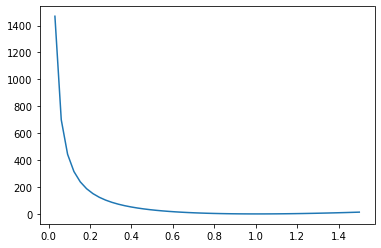

In [31]:
plt.plot(r_s, [f(r) for r in r_s])

### Plot attractive charges

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


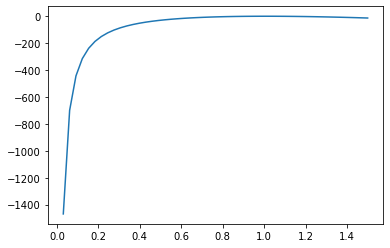

In [33]:
q1 = 0.5972
q2 = -0.5679
chargeProd=q1*q2
r_cutoff = 1.0
epsilon_solvent = 78.3
k_rf = ((1/r_cutoff)**3)*(epsilon_solvent-1)/((2*epsilon_solvent)+1)
c_rf = (1/r_cutoff)*(3*epsilon_solvent)/((2*epsilon_solvent)+1)
def f(r):
    return ONE_4PI_EPS0*chargeProd*((1/r) + k_rf*(r)**2 - c_rf)
plt.plot(r_s, [f(r) for r in r_s])